In [2]:
import mysql.connector
import pandas as pd


# Conexión a la base de datos
conexion = mysql.connector.connect(
    host="127.0.0.1",
    user="root",
    password="11jablum11",
    database="yfinance"
)

# Query para extraer los precios de cierre históricos de las empresas
query = """
SELECT e.simbolo, p.fecha, p.precio_cierre
FROM precios_historicos p
JOIN empresas_sp500 e ON p.id_empresa = e.id_empresa
"""

# Cargar los datos en un DataFrame de Pandas
df_precios = pd.read_sql(query, conexion)
conexion.close()


/var/folders/3l/2mfq68kd2m7_kpj_3qkpl1qw0000gn/T/ipykernel_59822/4046834366.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_precios = pd.read_sql(query, conexion)


In [3]:
df_precios.head()

,simbolo,fecha,precio_cierre
0,MMM,2000-01-03,19.8138
1,MMM,2000-01-04,19.0265
2,MMM,2000-01-05,19.5776
3,MMM,2000-01-06,21.1523
4,MMM,2000-01-07,21.5721


In [4]:
# Convertir las fechas a tipo datetime y reorganizar el DataFrame
df_precios['fecha'] = pd.to_datetime(df_precios['fecha'])
df_precios = df_precios.pivot(index='fecha', columns='simbolo', values='precio_cierre')
df_precios = df_precios.sort_index()  # Ordenar por fecha


In [6]:
# Calcular la matriz de correlación
matriz_correlacion = df_precios.corr()
matriz_correlacion


simbolo,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
simbolo,,,,,,,,,,,,,,,,,,,,,
A,1.000000,0.950445,0.902853,0.154206,0.966504,0.868548,0.983011,0.952849,0.969988,0.887482,...,0.969466,0.864056,0.395919,0.932527,0.712217,0.962036,0.938805,0.826889,0.934140,0.963709
AAPL,0.950445,1.000000,0.955795,-0.112067,0.947766,0.930002,0.971141,0.945638,0.976523,0.893117,...,0.944334,0.836662,0.288709,0.896301,0.773148,0.919767,0.927034,0.730772,0.885073,0.938131
ABBV,0.902853,0.955795,1.000000,-0.419011,0.869727,0.915171,0.928463,0.828393,0.957192,0.867289,...,0.925861,0.821468,-0.330565,0.817584,0.761353,0.898449,0.922757,0.517493,0.704747,0.875895
ABNB,0.154206,-0.112067,-0.419011,1.000000,0.590855,-0.258593,0.240309,0.564906,-0.050396,-0.602553,...,0.030401,0.311297,0.460389,-0.435918,-0.552051,0.237049,-0.189400,0.506793,0.646271,0.385600
ABT,0.966504,0.947766,0.869727,0.590855,1.000000,0.875111,0.984906,0.971984,0.955858,0.900856,...,0.975064,0.888592,0.415812,0.973141,0.717617,0.944328,0.971171,0.854662,0.946509,0.987409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XYL,0.962036,0.919767,0.898449,0.237049,0.944328,0.849336,0.958148,0.942250,0.968412,0.790979,...,0.968063,0.812163,-0.137631,0.899082,0.561920,1.000000,0.967832,0.756703,0.875310,0.937210
YUM,0.938805,0.927034,0.922757,-0.189400,0.971171,0.926578,0.974837,0.929485,0.947418,0.920001,...,0.979448,0.916702,0.519034,0.970931,0.823422,0.967832,1.000000,0.865855,0.877471,0.953786
ZBH,0.826889,0.730772,0.517493,0.506793,0.854662,0.731007,0.826815,0.813444,0.798700,0.789549,...,0.870290,0.898995,0.589038,0.887135,0.618801,0.756703,0.865855,1.000000,0.800815,0.718319


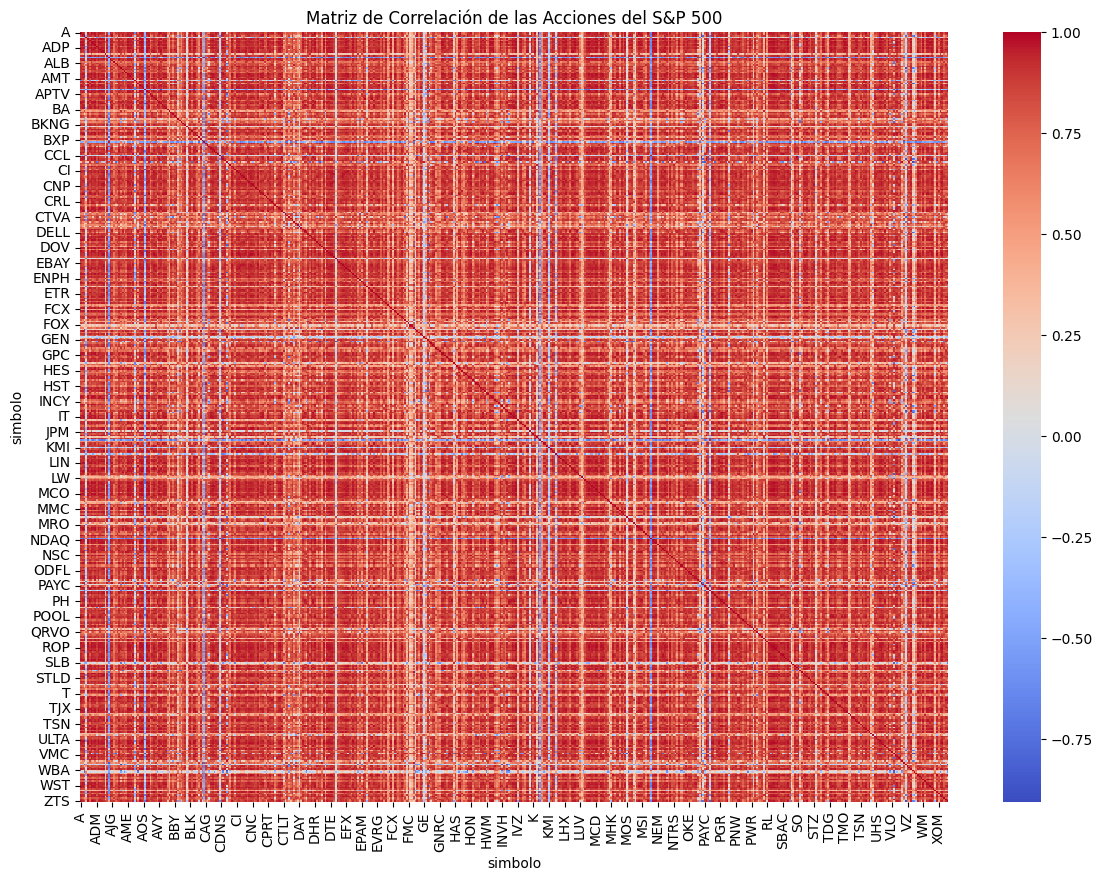

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 10))
sns.heatmap(matriz_correlacion, cmap="coolwarm", annot=False)
plt.title("Matriz de Correlación de las Acciones del S&P 500")
plt.show()
